In [1]:
%run package_import.ipynb
%run data_profiling.ipynb

In [2]:

from sqlalchemy import create_engine
import pymysql

sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1/kaggle_hour_price', pool_recycle=3600)
dbConnection    = sqlEngine.connect()

In [3]:
import os
os.chdir(path='/Users/liuyifu/Project_data')

In [4]:
df_train = pd.read_csv('House_Prices/train.csv')
df_train.to_sql('raw_train', dbConnection, if_exists='replace', index=False)

In [5]:
df_test = pd.read_csv('House_Prices/test.csv')
df_test.to_sql('raw_test', dbConnection, if_exists='replace', index=False)

In [9]:
df_combined = pd.concat([df_train,df_test])

#### Check columns with na

<AxesSubplot:>

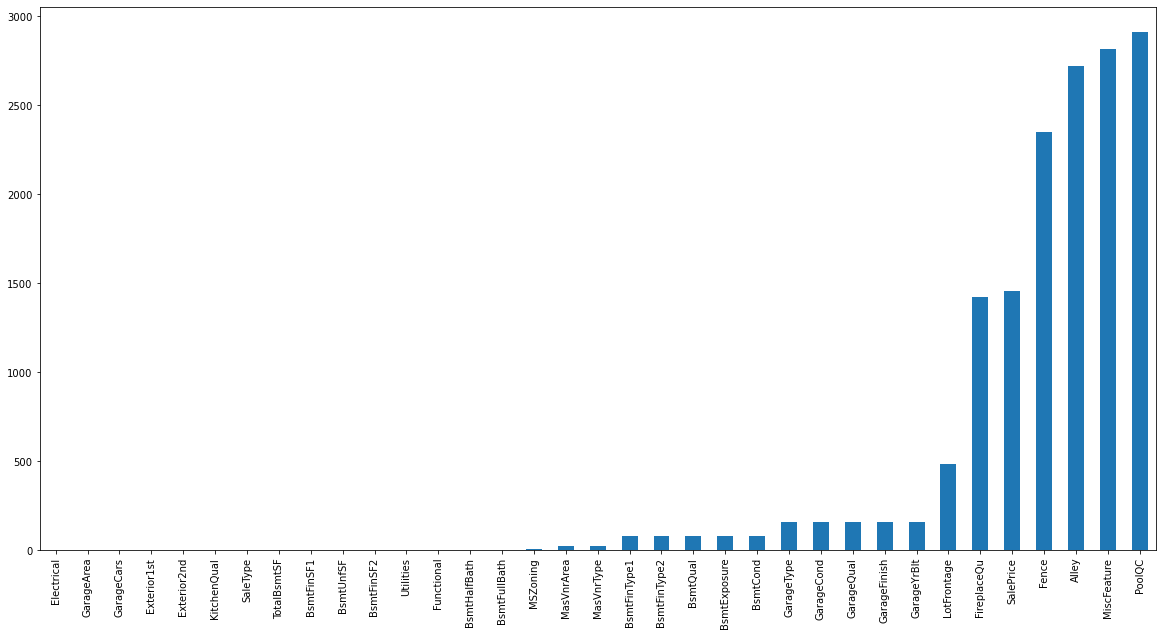

In [17]:
plt.figure(figsize=(20,10))
df_combined[df_combined.columns[df_combined.isna().sum()>0]].isna().sum().sort_values().plot.bar()

In [19]:
for col in df_combined.columns:

    

Series([], dtype: int64)

In [24]:
df_combined['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64